# Jonathan Halverson
# Thursday, January 10, 2018
# Part 1: Creating Reber and non-Reber grammars

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

![title](reber.jpg)

Our generating function is recursive:

In [2]:
def sub_branch(s_):
     while (np.random.choice([True, False])):
          s_ += 'T'
     s_ += 'V'
     if np.random.choice([True, False]):
          s_ += 'P'
          if np.random.choice([True, False]):
               s_ += 'SE'
          else:
               s_ += 'X'
               s_ = sub_branch(s_)
     else:
          s_ += 'VE'
     return s_

In [3]:
def make_reber_grammar():
     s = 'B'
     if np.random.choice([True, False]):
          s += 'T'
          while (np.random.choice([True, False])):
               s += 'S'
          s += 'X'
          if np.random.choice([True, False]):
               s += 'X'
               s = sub_branch(s)
          else:
               s += 'SE'
     else:
          s += 'P'
          s = sub_branch(s)
     return s

Be careful about the period of the RNG; it may only be 32768 which would explain why there are so few unique samples.

In [4]:
np.random.seed(424242)

In [5]:
N = 100000
correct_samples = [make_reber_grammar() for _ in range(N)]

In [6]:
correct_samples[:10]

['BPTTTVPSE',
 'BTSXXTVVE',
 'BTSSSXSE',
 'BPTVVE',
 'BPVPSE',
 'BPTVPXTVVE',
 'BTXSE',
 'BTSXXVPSE',
 'BTSXSE',
 'BTXSE']

What percentage of the samples are unique?

In [7]:
print '%.1f percent' % (100 * len(set(correct_samples)) / float(N))

2.4 percent


In [8]:
lengths_correct_samples = [len(sample) for sample in correct_samples]
n_inputs = max(lengths_correct_samples)
n_inputs

37

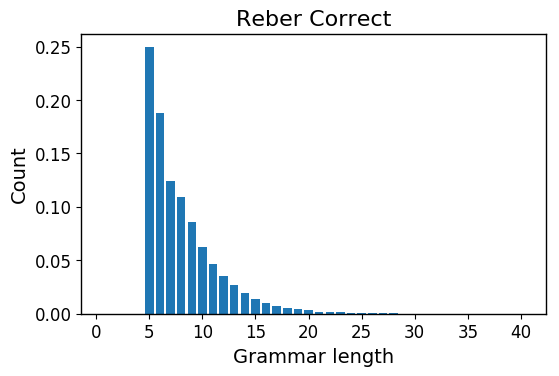

In [9]:
plt.hist(lengths_correct_samples, bins=np.linspace(0.5, 40.5, 41), normed=True, rwidth=0.8)
plt.xlabel('Grammar length')
plt.ylabel('Count')
plt.title('Reber Correct')

In [10]:
counts_correct_samples = np.bincount(lengths_correct_samples)
np.c_[np.arange(counts_correct_samples.size), counts_correct_samples]

array([[    0,     0],
       [    1,     0],
       [    2,     0],
       [    3,     0],
       [    4,     0],
       [    5, 24959],
       [    6, 18794],
       [    7, 12439],
       [    8, 10958],
       [    9,  8602],
       [   10,  6258],
       [   11,  4616],
       [   12,  3523],
       [   13,  2676],
       [   14,  1898],
       [   15,  1390],
       [   16,  1049],
       [   17,   740],
       [   18,   546],
       [   19,   413],
       [   20,   317],
       [   21,   202],
       [   22,   173],
       [   23,   131],
       [   24,    86],
       [   25,    64],
       [   26,    45],
       [   27,    30],
       [   28,    34],
       [   29,    18],
       [   30,     8],
       [   31,    12],
       [   32,     6],
       [   33,     5],
       [   34,     6],
       [   35,     1],
       [   36,     0],
       [   37,     1]])

In [11]:
length_proportions_correct = counts_correct_samples / float(N)
length_proportions_correct

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.49590000e-01,
         1.87940000e-01,   1.24390000e-01,   1.09580000e-01,
         8.60200000e-02,   6.25800000e-02,   4.61600000e-02,
         3.52300000e-02,   2.67600000e-02,   1.89800000e-02,
         1.39000000e-02,   1.04900000e-02,   7.40000000e-03,
         5.46000000e-03,   4.13000000e-03,   3.17000000e-03,
         2.02000000e-03,   1.73000000e-03,   1.31000000e-03,
         8.60000000e-04,   6.40000000e-04,   4.50000000e-04,
         3.00000000e-04,   3.40000000e-04,   1.80000000e-04,
         8.00000000e-05,   1.20000000e-04,   6.00000000e-05,
         5.00000000e-05,   6.00000000e-05,   1.00000000e-05,
         0.00000000e+00,   1.00000000e-05])

In [12]:
length_proportions_correct.sum()

0.99999999999999978

In [13]:
from collections import Counter

In [14]:
def show_character_proportions(words):
     joined = ''.join(words).replace('B', '').replace('E', '')
     characters = [c for c in joined]
     c = Counter(characters)
     char_proportions_correct = np.array(c.values()) / float(len(characters))

     for char, cnt, pro in zip(c.keys(), c.values(), char_proportions_correct):
          print char, cnt, pro
     print 'sum of proportions:', char_proportions_correct.sum()
     return c, char_proportions_correct

In [15]:
counts_correct, char_proportions_correct = show_character_proportions(correct_samples)

P 100092 0.16672024572
S 99997 0.166562007066
T 150034 0.249907138895
X 99821 0.166268849139
V 150415 0.250541759181
sum of proportions: 1.0


### Incorrect Reber samples

Now we know the frequencies that the letters should appear in. We will now construct incorrect Reber grammars using these same frequencies:

In [16]:
# could also not start with B and end with E
def make_wrong_grammar():
     length = np.random.choice(np.arange(38), size=1, p=length_proportions_correct)
     w = 'B'
     for _ in range(length - 2):
          w += np.random.choice(counts_correct.keys(), size=1, p=char_proportions_correct)[0]
     w += 'E'
     return w

Note that np.random.choice returns the following:

In [17]:
np.random.choice(counts_correct.keys(), size=1, p=char_proportions_correct)

array(['T'], 
      dtype='|S1')

In [18]:
mega = set([make_reber_grammar() for _ in range(1000000)])
len(mega)

8505

In [19]:
def is_wrong(w):
     wrong_ending = (w[-2] == 'P' or w[-2] == 'T' or w[-2] == 'X')
     wrong_begin = (w[1] == 'S' or w[1] == 'V' or w[1] == 'X')
     wrong_path_1 = ('PE' in w or 'PP' in w)
     wrong_path_2 = ('SP' in w or 'SV' in w or 'ST' in w)
     wrong_path_3 = ('TP' in w or 'TE' in w)
     wrong_path_4 = ('VS' in w or 'VT' in w or 'VX' in w or 'VVV' in w)
     wrong_path_5 = ('XP' in w or 'XE' in w or 'XXX' in w)
     if (any([wrong_ending, wrong_begin, wrong_path_1, wrong_path_2,
              wrong_path_3, wrong_path_4, wrong_path_5])):
          return True
     else:
          return False

In [20]:
incorrect_samples = filter(is_wrong, [make_wrong_grammar() for _ in range(100000)])
incorrect_samples[:10]

['BVVSVVPVVE',
 'BXXSTVE',
 'BTPTTE',
 'BSPTE',
 'BPPSVTTE',
 'BVSTPSPE',
 'BSPPE',
 'BVVVE',
 'BXVVTVVSPTE',
 'BVSVXE']

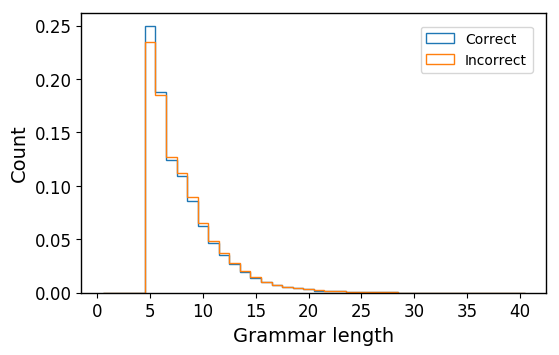

In [21]:
b = np.linspace(0.5, 40.5, 41)
plt.hist(lengths_correct_samples, bins=b, normed=True, histtype='step', label='Correct')
plt.hist([len(w) for w in incorrect_samples], bins=b, normed=True, histtype='step', label='Incorrect')
plt.xlabel('Grammar length')
plt.ylabel('Count')
_ = plt.legend()

In [22]:
len(incorrect_samples)

95142

In [23]:
len(set(incorrect_samples))

42718

In [24]:
any([w in mega for w in incorrect_samples])

False

In [25]:
_ = show_character_proportions(incorrect_samples)

P 97228 0.167321188258
S 97160 0.167204165993
T 143967 0.247755065515
X 96944 0.166832448209
V 145787 0.250887132025
sum of proportions: 1.0


### Create numerical encodings

In [26]:
chars = ['B', 'E', 'P', 'S', 'T', 'V', 'X']
padding = np.zeros(n_inputs, dtype=np.int)
trans = dict([(u, v) for u, v in zip(chars, range(1, len(chars) + 1))])
trans

{'B': 1, 'E': 2, 'P': 3, 'S': 4, 'T': 5, 'V': 6, 'X': 7}

In [27]:
import cPickle

def write_encodings(A, fname, target, N_cut=50000):
     X_out = []
     y_out = []
     L_out = []
     for sample in A[:N_cut]:
          encoding = np.array([trans[character] for character in sample])
          encoding_w_pad = np.append(encoding, padding[:n_inputs - encoding.size])
          X_out.append(encoding_w_pad)
          y_out.append(target)
          L_out.append(encoding.size)
     f = open(fname, 'wb')
     cPickle.dump(np.array(X_out), f)
     cPickle.dump(np.array(y_out), f)
     cPickle.dump(np.array(L_out), f)
     f.close()

In [28]:
write_encodings(correct_samples, 'X_correct.reb', 1)
write_encodings(incorrect_samples, 'X_incorrect.reb', 0)

### Create one-hot encodings

In [59]:
def write_one_hot_encodings(A, fname, target, N_cut=50000):
     X_out = []
     y_out = []
     L_out = []
     trans = dict([(u, v) for u, v in zip(chars, range(len(chars)))])
     for sample in A[:N_cut]:
          letters = [character for character in sample]
          ohe = np.zeros(shape=(n_inputs, len(chars)), dtype=np.int32)
          for i, char in enumerate(letters):
               ohe[i, trans[char]] = 1
          X_out.append(ohe)
          y_out.append(target)
          L_out.append(len(letters))
     f = open(fname, 'wb')
     cPickle.dump(np.array(X_out), f)
     cPickle.dump(np.array(y_out), f)
     cPickle.dump(np.array(L_out), f)
     f.close()

In [60]:
write_one_hot_encodings(correct_samples, 'X_correct_one_hot.reb', 1)
write_one_hot_encodings(incorrect_samples, 'X_incorrect_one_hot.reb', 0)

In [66]:
np.random.seed(123)
correct_samples = [make_reber_grammar() for _ in range(1000000)]
lengths = [len(sample) for sample in correct_samples]
print max(lengths)

53


In [67]:
np.argwhere(np.array(lengths) == 53)

array([[508785]])

In [68]:
correct_samples[508785]

'BTXXTVPXTTVPXTVPXTTVPXTTTTTTTVPXTTTVPXVPXTTTTTVPXVPSE'